In [21]:
 #! Bootcamb Day one Data Science 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 


# Data Set Content🤔
Here, I have extracted data related to 10k courses which come under the development category on Udemy's website. The 17 columns in the dataset can be used to gain insights related to:


**id**: The unique identifier assigned to each course in the dataset.

**title**: The title or name of the course as listed on Udemy's platform.

**url**: The URL of the course on Udemy's website.

**is_paid**: A boolean value indicating whether the course is paid (True) or free (False).

**num_subscribers**: The number of individuals who have subscribed to the course.

**avg_rating**: The average rating of the course based on user reviews.

**avg_rating_recent**: The recent changes in the average rating of the course.

**num_reviews**: The total number of reviews or ratings that the course has received.

**is_wishlisted**: Indicates whether the course is wishlisted by users (True) or not (False).

**num_published_lectures**: The total number of lectures available in the course.

**num_published_practice_tests**: The number of practice tests included in the course.

**created**: The timestamp indicating the creation time of the course.

**published_time**: The timestamp indicating the time when the course was published.

**discounted_price_amount**: The discounted price at which the course is being offered.

**discounted_price_currency**: The currency corresponding to the discounted price of the course.

**discounted_price_price_string**: A formatted string representing the discounted price of the course.

**price_detail_amount**: The original price of the course before any discounts.

**price_detail_currency**: The currency corresponding to the original price of the course.

**price_detail_price_string**: A formatted string representing the original price of the course.



In [20]:
# Load the dataset
df=pd.read_csv("../datasets/dataset.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 1. Data Exploration📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [2]:

# Drop unnecessary columns for simplicity
columns_to_drop = ['url', 'discount_price__currency', 'discount_price__price_string',
                   'price_detail__currency', 'price_detail__price_string','avg_rating_recent','avg_rating']
df.drop(columns=columns_to_drop,inplace=True,axis=1)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   is_paid                       13608 non-null  bool   
 3   num_subscribers               13608 non-null  int64  
 4   rating                        13608 non-null  float64
 5   num_reviews                   13608 non-null  int64  
 6   is_wishlisted                 13608 non-null  bool   
 7   num_published_lectures        13608 non-null  int64  
 8   num_published_practice_tests  13608 non-null  int64  
 9   created                       13608 non-null  object 
 10  published_time                13608 non-null  object 
 11  discount_price__amount        12205 non-null  float64
 12  price_detail__amount          13111 non-null  float64
dtypes

,id,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0


In [3]:
df['created'].head()

0    2016-02-14T22:57:48Z
1    2016-08-22T12:10:18Z
2    2017-09-26T16:32:48Z
3    2015-10-23T13:34:35Z
4    2015-10-12T06:39:46Z
Name: created, dtype: object

In [4]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])
df['created'].head()

0   2016-02-14 22:57:48+00:00
1   2016-08-22 12:10:18+00:00
2   2017-09-26 16:32:48+00:00
3   2015-10-23 13:34:35+00:00
4   2015-10-12 06:39:46+00:00
Name: created, dtype: datetime64[ns, UTC]

### Changing Currency to USD

**in this step we will convert the currency from INR (Indian Rupees) to USD by multiply the the actual data by 83.33**

In [5]:
df['discount_price__amount']

0        455.0
1        455.0
2        455.0
3        455.0
4        455.0
         ...  
13603      NaN
13604      NaN
13605      NaN
13606      NaN
13607      NaN
Name: discount_price__amount, Length: 13608, dtype: float64

In [6]:
df['discount_price__amount']= df['discount_price__amount']/83.33
df['price_detail__amount']= df['price_detail__amount']/83.33
df['discount_price__amount']

0        5.460218
1        5.460218
2        5.460218
3        5.460218
4        5.460218
           ...   
13603         NaN
13604         NaN
13605         NaN
13606         NaN
13607         NaN
Name: discount_price__amount, Length: 13608, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   rating                        13608 non-null  float64            
 5   num_reviews                   13608 non-null  int64              
 6   is_wishlisted                 13608 non-null  bool               
 7   num_published_lectures        13608 non-null  int64              
 8   num_published_practice_tests  13608 non-null  int64              
 9   created                       13608 non-null  datetime64[ns, UTC]
 10  published_time                1360

### Percent of discount
**in this step we will calculate the percentage of disconted price using the difference between the total amont and the dicounted amont column, and then we will impute the missing values in each column**

In [8]:
df['discount_percentage'] = (df['discount_price__amount'] / df['price_detail__amount'])*100
df['discount_percentage']

0        5.266204
1        5.266204
2        5.266204
3        5.266204
4        5.266204
           ...   
13603         NaN
13604         NaN
13605         NaN
13606         NaN
13607         NaN
Name: discount_percentage, Length: 13608, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   rating                        13608 non-null  float64            
 5   num_reviews                   13608 non-null  int64              
 6   is_wishlisted                 13608 non-null  bool               
 7   num_published_lectures        13608 non-null  int64              
 8   num_published_practice_tests  13608 non-null  int64              
 9   created                       13608 non-null  datetime64[ns, UTC]
 10  published_time                1360

In [10]:
# Handle missing values in numeric columns using mean imputation
numeric_columns = ['discount_price__amount','discount_percentage', 'price_detail__amount']
imputer = SimpleImputer(strategy='median')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   rating                        13608 non-null  float64            
 5   num_reviews                   13608 non-null  int64              
 6   is_wishlisted                 13608 non-null  bool               
 7   num_published_lectures        13608 non-null  int64              
 8   num_published_practice_tests  13608 non-null  int64              
 9   created                       13608 non-null  datetime64[ns, UTC]
 10  published_time                1360

In [11]:
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.strip().replace(r'\s+', ' ', regex=True)
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)

In [12]:
def categorize_title(title):
    title_lower = title.lower()
    if 'sql' in title_lower or 'mysql' in title_lower or 'database' in title_lower:
        return 'Database'
    elif 'tableau' in title_lower or 'power bi' in title_lower or 'data viz' in title_lower:
        return 'Data Visualization'
    elif 'excel' in title_lower or 'spreadsheet' in title_lower:
        return 'Spreadsheet'
    elif any(kw in title_lower for kw in ['agile', 'scrum', 'pmp', 'project management']):
        return 'Project Management'
    elif any(kw in title_lower for kw in ['financial', 'finance', 'accounting']):
        return 'Finance'
    elif 'mba' in title_lower or 'business' in title_lower or 'enterprise' in title_lower:
        return 'Business'
    elif any(kw in title_lower for kw in ['write', 'writing', 'editorial']):
        return 'Writing'
    elif 'sale' in title_lower or 'marketing' in title_lower:
        return 'Sales/Marketing'
    elif any(kw in title_lower for kw in ['data science', 'analytics', 'machine learning']):
        return 'Data Science'
    elif 'management' in title_lower:
        return 'Management'
    elif 'leadership' in title_lower:
        return 'Leadership'
    elif 'communication' in title_lower:
        return 'Communication'
    else:
        return 'Other'

df['category'] = df['title'].apply(categorize_title)
df.head(2)

,id,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,discount_percentage,category
0,762616,the complete sql bootcamp 2020 go from zero to...,True,295509,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,5.460218,103.684147,5.266204,Database
1,937678,tableau 2020 az handson tableau training for d...,True,209070,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,5.460218,103.684147,5.266204,Data Visualization


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  bool               
 3   num_subscribers               13608 non-null  int64              
 4   rating                        13608 non-null  float64            
 5   num_reviews                   13608 non-null  int64              
 6   is_wishlisted                 13608 non-null  bool               
 7   num_published_lectures        13608 non-null  int64              
 8   num_published_practice_tests  13608 non-null  int64              
 9   created                       13608 non-null  datetime64[ns, UTC]
 10  published_time                1360

In [14]:
df['category'].value_counts()

category
Other                 8685
Business              1450
Finance               1119
Management             523
Sales/Marketing        516
Project Management     374
Spreadsheet            263
Writing                259
Data Visualization     129
Data Science            99
Leadership              74
Communication           71
Database                46
Name: count, dtype: int64

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 2. EDA📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



<div style="text-align:center; background-color:#00000; padding:20px;">
  <h1 style="font-size:36px; color:#fffff;"><b>Numerical Analysis </b></h1>
</div>

### Top 10 Courses by Rating


C:\Users\abdel\AppData\Local\Temp\ipykernel_15696\2473072524.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


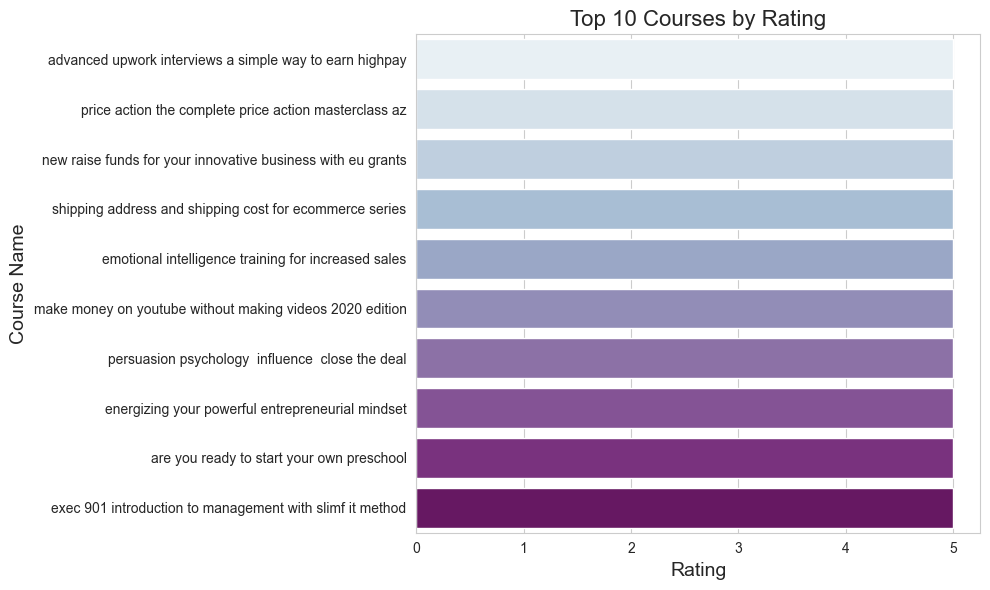

In [15]:
# Sort the DataFrame by 'rating' in ascending order of preference and take the top 10
top_10_rated = df.nlargest(10, 'rating').sort_values('rating', ascending=True)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot with 'title' on the x-axis and 'rating' on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(
    x="rating",
    y="title",
    data=top_10_rated,
    palette="BuPu",  # Use a color palette
    orient="h"
)

# Add a title and labels
plt.title("Top 10 Courses by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Course Name", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### Top 10 Courses by Number of Subscribers

C:\Users\abdel\AppData\Local\Temp\ipykernel_15696\1277879421.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


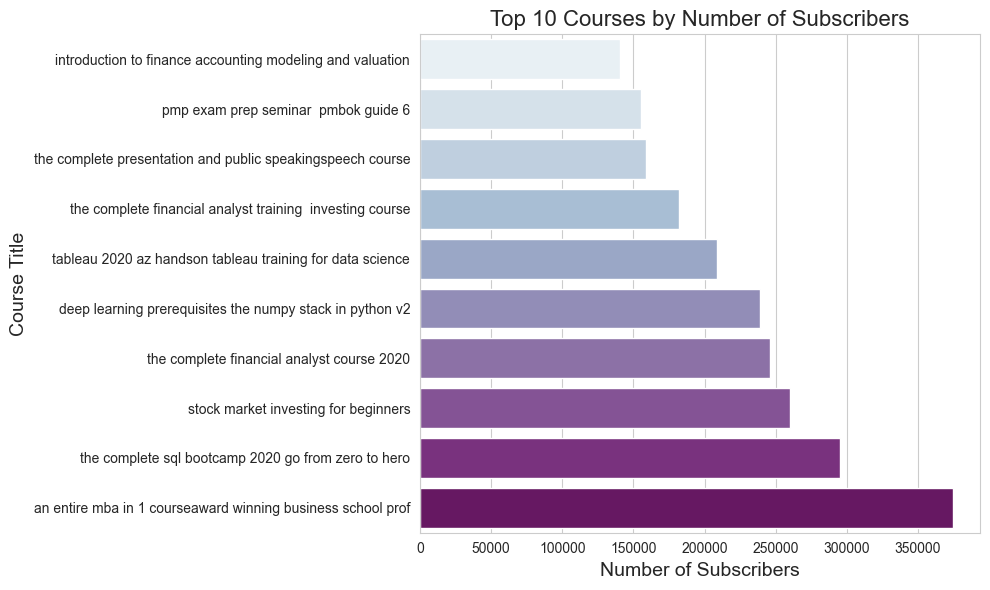

In [16]:
# Sort the DataFrame by 'num_subscribers' in ascending order of preference and take the top 10
top_10_subscribers = df.nlargest(10, 'num_subscribers').sort_values('num_subscribers', ascending=True)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot with 'title' on the x-axis and 'rating' on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(
    x="num_subscribers",
    y="title",
    data=top_10_subscribers,
    palette="BuPu",  # Use a color palette
    orient="h"
)

# Add a title and labels
plt.title("Top 10 Courses by Number of Subscribers", fontsize=16)
plt.xlabel("Number of Subscribers", fontsize=14)
plt.ylabel("Course Title", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### Top 10 Courses by Discount Percentage

C:\Users\abdel\AppData\Local\Temp\ipykernel_15696\3986593608.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


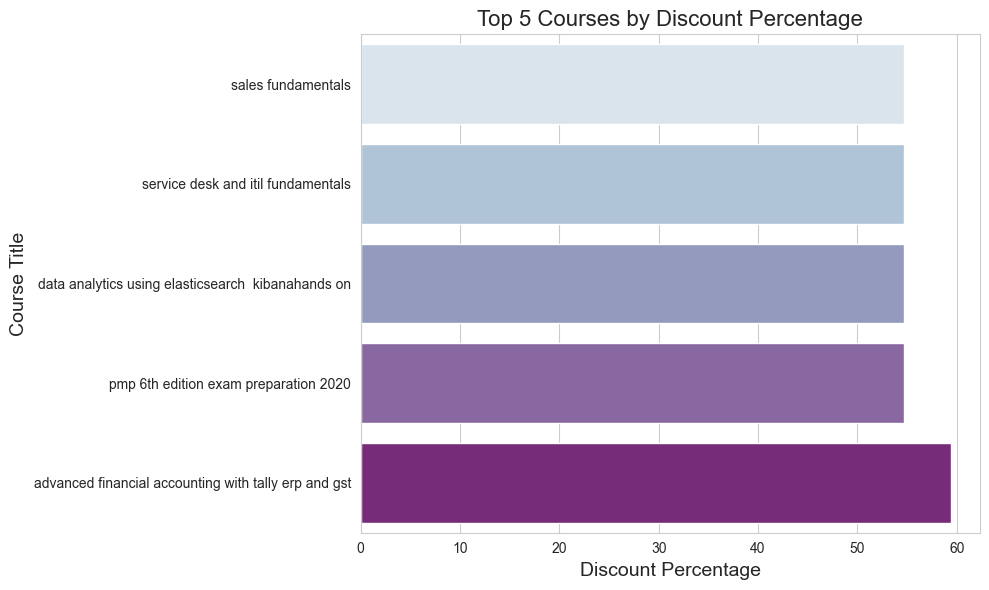

In [17]:
# Sort the DataFrame by 'discount_percentage' in descending order of preference and take the top 10
top_5_discount_percentage = df.nlargest(5, 'discount_percentage').sort_values('discount_percentage', ascending=True)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot with 'title' on the x-axis and 'rating' on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(
    x="discount_percentage",
    y="title",
    data=top_5_discount_percentage,
    palette="BuPu",  # Use a color palette
    orient="h"
)

# Add a title and labels
plt.title("Top 5 Courses by Discount Percentage", fontsize=16)
plt.xlabel("Discount Percentage", fontsize=14)
plt.ylabel("Course Title", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()  

### Most Expensive Cources

C:\Users\abdel\AppData\Local\Temp\ipykernel_15696\1350009154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


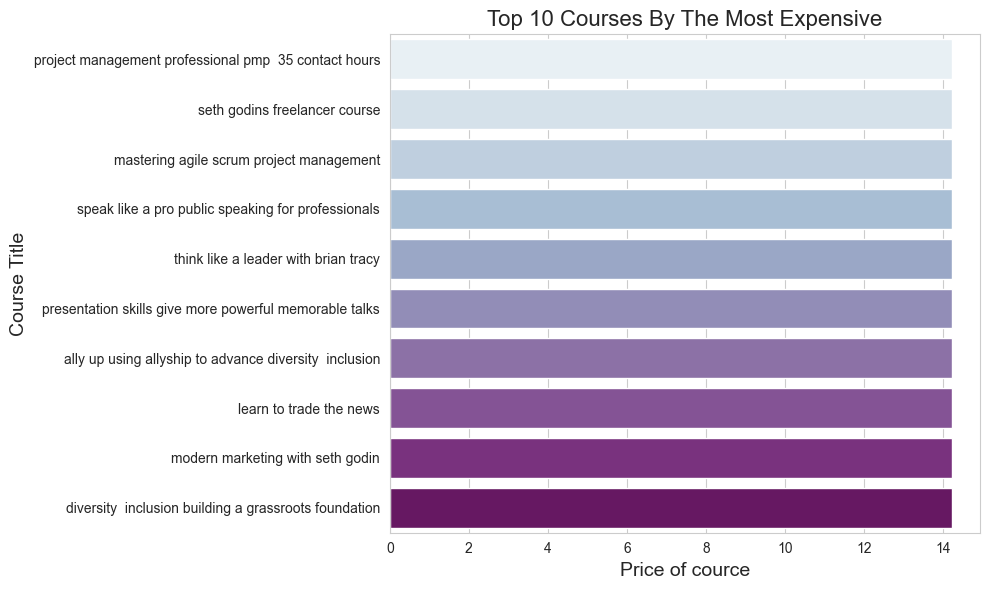

In [19]:
# Sort the DataFrame by 'price_detail__amount' in descending order of preference and take the top 10
top_10_price_detail__amount = df.nlargest(10, 'price_detail__amount').sort_values('price_detail__amount', ascending=True)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot with 'title' on the x-axis and 'rating' on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(
    x="discount_percentage",
    y="title",
    data=top_10_price_detail__amount,
    palette="BuPu",  # Use a color palette
    orient="h"
)

# Add a title and labels
plt.title("Top 10 Courses By The Most Expensive", fontsize=16)
plt.xlabel("Price of cource", fontsize=14)
plt.ylabel("Course Title", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()  


<div align="start">
    <a href="https://www.facebook.com/abdelmenam.adel.10" target="_blank">
        <img src="https://img.shields.io/badge/FaceBook-0077B5?style=for-the-badge&logo=Facebook&logoColor=white" target="_blank" />
    </a>
      <a href="https://www.linkedin.com/in/abdelmenam-adel-175b35265/" target="_blank">
        <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank" />
    </a>
  <a href="mailto:abdelmoneim.adel5@gmail.com">
    <img src="https://img.shields.io/badge/Gmail-333333?style=for-the-badge&logo=gmail&logoColor=red" />
  </a>
    <a href="https://www.youtube.com/@abdelmenamadel5373">
    <img src="https://img.shields.io/badge/Youtube-red?style=for-the-badge&logo=youtube&logoColor=white" />
  </a>
</div>